### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [1]:
# write your answer here
from bs4 import BeautifulSoup
import requests

### weather in Tanger

In [15]:
#The url is the page that contain 10 days forcasts weather of Tanger 
url1="https://weather.com/fr-MA/temps/10jours/l/d85f06e72cf2831588a6321bed1d67ed17af1d3d7fe060cc7f2c5ccbfa35e911"
weather_tanger = requests.get(url1 )
weather_tanger 

<Response [200]>

In [16]:
soup = BeautifulSoup(weather_tanger.content, 'html.parser')

In [69]:
#soup.prettify()

In [18]:
import csv
import pandas as pd
weathers=[]  # a list to store quotes


day =soup.find_all('h3',attrs = {'class':"DetailsSummary--daypartName--kbngc"})
temp_value = soup.find_all('span', attrs={'class':"DetailsSummary--highTempValue--3PjlX",'data-testid':"TemperatureValue"})
low_temp = soup.find_all('span', attrs={'class':"DetailsSummary--lowTempValue--2tesQ",'data-testid':"TemperatureValue"})
weather_state = soup.find_all('div', attrs={'class':"DailyContent--Condition--1zRBJ" ,'data-testid':"weatherIcon"})
for row in range(len(day)):
    weather = {}
    weather['day'] = day[row].text
    weather['temp_value'] = temp_value[row].text
    weather['low_temp'] = low_temp[row].text
    weather['weather_state'] = weather_state[row].text
    

    weathers.append(weather)
#we can store our data in .csv file   
"""filename = 'tanger_weather.csv'
with open(filename, 'w', newline='') as f:
    w = csv.DictWriter(f,['day','temp','low_temp'])
    w.writeheader()
    for weather in weathers:
        w.writerow(weather)"""
# or we can store it in pandas dataframe
w_tanger= pd.DataFrame(weathers)

In [19]:
w_tanger

,day,temp_value,low_temp,weather_state
0,Ce soir,--,15°,Scattered Showers
1,mer. 21,19°,13°,Scattered Showers
2,jeu. 22,18°,12°,Partly Cloudy Night
3,ven. 23,19°,12°,Partly Cloudy
4,sam. 24,19°,12°,Mostly Clear Night
5,dim. 25,22°,14°,Mostly Sunny
6,lun. 26,20°,14°,Mostly Clear Night
7,mar. 27,20°,14°,Foggy
8,mer. 28,19°,14°,Mostly Clear Night
9,jeu. 29,18°,13°,Partly Cloudy


In [42]:
#here we select runing days by weather status 
T=w_tanger.loc[w_tanger['weather_state']=='Scattered Showers'].count()
tanger_runing_days=T["weather_state"]
tanger_runing_days

3

### weather in Benguerir

In [21]:
#The url is the page that contain 10 days forcasts weather of benguerir city 
url2="https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"
weather_benguerir = requests.get(url2)
print(weather_benguerir) 
soup = BeautifulSoup(weather_benguerir.content, 'html.parser')

<Response [200]>


In [22]:
import csv
import pandas as pd
weathers=[]  # a list to store quotes


day =soup.find_all('h3',attrs = {'class':"DetailsSummary--daypartName--kbngc"})
temp_value = soup.find_all('span', attrs={'class':"DetailsSummary--highTempValue--3PjlX",'data-testid':"TemperatureValue"})
low_temp = soup.find_all('span', attrs={'class':"DetailsSummary--lowTempValue--2tesQ",'data-testid':"TemperatureValue"})
weather_state = soup.find_all('div', attrs={'class':"DailyContent--Condition--1zRBJ" ,'data-testid':"weatherIcon"})
for row in range(len(day)):
    weather = {}
    weather['day'] = day[row].text
    weather['temp_value'] = temp_value[row].text
    weather['low_temp'] = low_temp[row].text
    weather['weather_state'] = weather_state[row].text
    

    weathers.append(weather)
#we can store our data in .csv file   
"""filename = 'tanger_weather.csv'
with open(filename, 'w', newline='') as f:
    w = csv.DictWriter(f,['day','temp','low_temp'])
    w.writeheader()
    for weather in weathers:
        w.writerow(weather)"""
# or we can store it in pandas dataframe
w_benguerir= pd.DataFrame(weathers)

In [49]:
#here we select runing days by weather status
B=w_benguerir.loc[w_benguerir['weather_state']=='Scattered Showers'].count()
Bg_runing_days=B["weather_state"]
Bg_runing_days

0

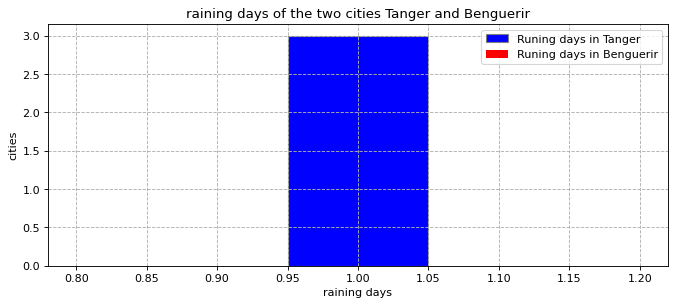

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4), dpi=80)
plt.bar(1, tanger_runing_days,color ='b', width=0.1,
        edgecolor ='grey',align='center',label='Runing days in Tanger')
plt.bar(1,Bg_runing_days , 0.4, label = 'Runing days in Benguerir',color ='r')
plt.xlabel("raining days")
plt.ylabel("cities")
plt.title("raining days of the two cities Tanger and Benguerir")
plt.grid(linestyle='--')
plt.legend()
plt.show()

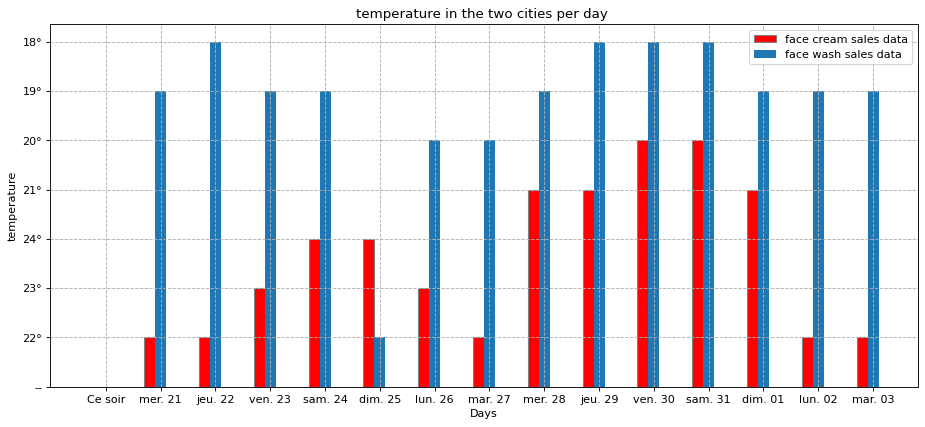

In [67]:
import numpy as np
day=w_benguerir["day"]
plt.figure(figsize=(14, 6), dpi=80)
X_axis = np.arange(len(day))
plt.bar(X_axis-0.2, w_benguerir["temp_value"],color ='r', width=0.2,
        edgecolor ='grey', label ='face cream sales data',align='center')
plt.bar(X_axis, w_tanger["temp_value"], width=0.2,label ='face wash sales data',align='center')
plt.xlabel("Days")
plt.xticks(X_axis, day)
plt.ylabel("temperature")
plt.title("temperature in the two cities per day ")
plt.grid(linestyle='--')
plt.legend()
plt.show()